In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Reading in the dataset

In [3]:
train = pd.read_csv("/Users/actify/Downloads/mnist-in-csv/mnist_train.csv")
test = pd.read_csv("/Users/actify/Downloads/mnist-in-csv/mnist_test.csv")

In [4]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [5]:
X_train = train.drop('label', axis='columns').values

In [6]:
y_train=train['label'].values

In [7]:
X_test = test.drop('label', axis='columns').values

In [8]:
y_test=test['label'].values

In [9]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [30]:
some_digit = X_train[1453]
some_digit_image = some_digit.reshape(28, 28)

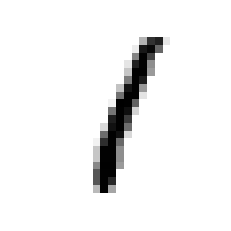

In [31]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [14]:
y_train_5, y_test_5 = (y_train == 5), (y_test==5)

In [15]:
# SGD Classifiesr

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf=SGDClassifier(random_state=42)

In [24]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
sgd_clf.predict(some_digit.reshape(1,-1))

array([False])

# Performance Measures

### Measuring accuracy using cross validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.9647, 0.9533, 0.9608])